In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False


import mglearn

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier       # 분류용
from sklearn.linear_model import LogisticRegression      # 로지스틱 회귀, 비선형
from sklearn.svm import LinearSVC                        # 머신러닝 중 가장 성능이 좋은 선형 회귀 알고리즘(분류용)
from sklearn.svm import SVC                              # 서포트 벡터 머신(svm)머신러닝에서 가장 성능이 좋다고 알려진 알고리즘 

from sklearn.tree import DecisionTreeClassifier          # 결정나무
from sklearn.ensemble import RandomForestClassifier      # 앙상블
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier            # 하드 보팅을 쓸지, 소프트 보팅을 쓸지

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder   # 정규화, 표준화, 인코딩
from sklearn.model_selection import train_test_split   # 훈련용과 테스트용으로 데이터 분할
from sklearn.model_selection import cross_val_score, cross_validate
                                                        # Stratified K Fold를 간편하게 사용하기 위한 함수
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
                                                        # 검증과 튜닝을 동시에 하는 함수
from sklearn.metrics import accuracy_score             # score과 같지만 분류에서 직관적으로 이름을 확인하기 위한 함수
from sklearn.metrics import confusion_matrix           # 오차행렬을 그려주는 함수
from sklearn.metrics import classification_report, roc_curve
                                # classification_report : 정확도, 정밀도, 재현율, F1 Score의 정보를 한번에 확인 가능한 함수 
                                # roc_curve : 시각적으로 표현 가능하게 해주는 함수

from sklearn.datasets import load_iris, load_boston, load_breast_cancer  # 자주 사용하는 데이터셋

In [2]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default") # 경고문 다시 뜨도록

# 1. 인공 신경망(Artificial Neural Network)

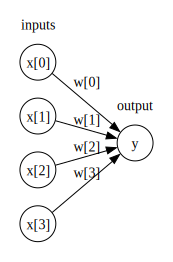

In [3]:
mglearn.plots.plot_logistic_regression_graph()

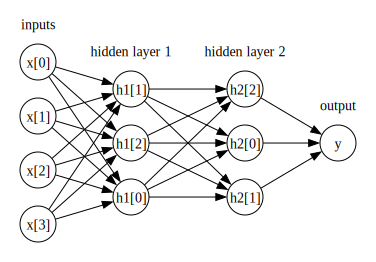

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()
# input layer -> 입력층
# hidden layer -> 은닉층(입력한 값에 가중치를 곱한 값)
# output layer -> 출력층(은닉층에 다시 한번 가중치를 곱한 값)

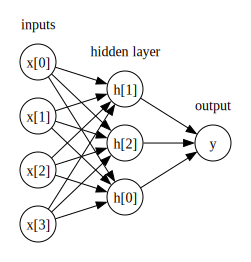

In [5]:
mglearn.plots.plot_single_hidden_layer_graph()
# layer = h[1] + h[2] + h[3] # 한 단계에 있는 모든 Perceptron
# Perceptron = h[] 1개. layer를 구성하는 1개
# MLP = Multi Layer Perceptron 여러개의 퍼셉트론 레이어 

## (1) Perceptron

- 다수의 신호를 입력으로 받아 하나의 신호로 출력

### 1) AND gate

In [6]:
def AND(x1, x2):
    x = np.array([x1, x2]) # 입력 데이터
    w = np.array([0.5, 0.5]) # 학습 데이터
    b = -0.7
    
    result =  np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [7]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 0
0, 1 -> 0
1, 1 -> 1


In [8]:
x = np.array([x1, x2])

In [9]:
w = np.array([0.5, 0.5])

In [10]:
w

array([0.5, 0.5])

In [11]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    result =  np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [12]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = OR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 1


In [13]:
"""
XOR(Exclusive OR)
- 서로 다른 값이 들어와야 T (논리값이 다르면)
- 서로 같은 값일 경우 F (논리값이 같다면)
- XOR(비트연산자) : Data를 암호화, 복호화 할 때 사용
========================

x1   x2   and   or   XOR
--------------------------------
T    T    T     T     F
T    F    F     T     T
F    T    F     T     T
F    F    F     F     F

"""

'\nXOR(Exclusive OR)\n- 서로 다른 값이 들어와야 T (논리값이 다르면)\n- 서로 같은 값일 경우 F (논리값이 같다면)\n- XOR(비트연산자) : Data를 암호화, 복호화 할 때 사용\n========================\n\nx1   x2   and   or   XOR\n--------------------------------\nT    T    T     T     F\nT    F    F     T     T\nF    T    F     T     T\nF    F    F     F     F\n\n'

In [14]:
x = 12 # 00001100
key = 26543 # 01001100

result = x ^ key # ^ = XOR
print("암호화된 결과 : ", result)

print("복호화된 결과 : ", result ^ key)

암호화된 결과 :  26531
복호화된 결과 :  12


### 3) NAND gate

In [15]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    result =  np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [16]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = NAND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 1
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


### 4) XOR gate

In [17]:
def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    
    return y

In [18]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = XOR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


## (2) 사이킷런에서의 인공신경망 구현

- scikit Learn : Perceptron(), MLPClassifier()
- ML, DL 프레임워크 : Theano, Tensorflow, Pytorc, ...

### 1) Perceptron()

In [19]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = .3)

# split 상태에 따라서 값이 바뀐다

In [20]:
model = Perceptron(max_iter=40, eta0=0.1, random_state = 0) # eta0 = 런닝메이트의 일종
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [21]:

# 결과확인
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.5333333333333333


In [22]:
# 정규화

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = Perceptron(max_iter=40, eta0=0.1, random_state = 0) # eta0 = 런닝메이트의 일종
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8888888888888888


### 2) MLPClassifier()

In [23]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = .3)

In [24]:
model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(200, 200, 200))
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=100)

In [25]:
# 결과확인
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9777777777777777


# 2. 종합 예제1

In [26]:
data = pd.read_csv("data/TravelInsurance.csv")

In [27]:
data.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,1,Government Sector,Yes,No,No,0
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No,0
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No,1
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No,0
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   AnnualIncome         1987 non-null   int64 
 2   FamilyMembers        1987 non-null   int64 
 3   ChronicDiseases      1987 non-null   int64 
 4   Employment Type      1987 non-null   object
 5   GraduateOrNot        1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## (1) X, y 나누기

In [29]:
X = data[data.columns[0:-1]]
y = data[[data.columns[-1]]]

In [30]:
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,31,400000,6,1,Government Sector,Yes,No,No
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,Private Sector/Self Employed,Yes,Yes,Yes
1983,28,1750000,5,1,Private Sector/Self Employed,Yes,No,Yes
1984,28,1150000,6,1,Private Sector/Self Employed,Yes,No,No
1985,34,1000000,6,0,Private Sector/Self Employed,Yes,Yes,Yes


In [31]:
y

,TravelInsurance
0,0
1,0
2,1
3,0
4,0
...,...
1982,1
1983,0
1984,0
1985,1


## (2) train, test 나누기

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 42)

## (3) Preprocessing

In [33]:
#### 연속변수끼리 나누기
X_num = X_train[X_train.columns[0:4]]

### 범주형 변수끼리 나누기
X_cat = X_train[X_train.columns[4:]]

### 범주형 변수 원 핫 인코딩
X_cat = pd.get_dummies(X_cat)

In [34]:
X_cat # 원핫 인코딩을 할 경우 인덱스가 엉망이 되므로 인덱스 재조정이 필요함

,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
1027,0,1,1,0,0,1,1,0
990,0,1,0,1,0,1,1,0
1550,0,1,0,1,1,0,1,0
18,0,1,0,1,1,0,1,0
1020,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
332,0,1,0,1,0,1,1,0
690,0,1,0,1,1,0,0,1
1769,0,1,0,1,1,0,1,0
199,0,1,1,0,0,1,0,1


In [35]:
### 인덱스 재조정
X_cat = X_cat.reset_index(drop=True)

In [36]:
#### 테스트 데이터에서도 동일하게 진행
test_num = X_test[X_test.columns[0:4]]
test_cat = X_test[X_test.columns[4:]]
test_cat = pd.get_dummies(test_cat)
test_cat = test_cat.reset_index(drop=True)

In [37]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Employment Type_Government Sector             1390 non-null   uint8
 1   Employment Type_Private Sector/Self Employed  1390 non-null   uint8
 2   GraduateOrNot_No                              1390 non-null   uint8
 3   GraduateOrNot_Yes                             1390 non-null   uint8
 4   FrequentFlyer_No                              1390 non-null   uint8
 5   FrequentFlyer_Yes                             1390 non-null   uint8
 6   EverTravelledAbroad_No                        1390 non-null   uint8
 7   EverTravelledAbroad_Yes                       1390 non-null   uint8
dtypes: uint8(8)
memory usage: 11.0 KB


In [38]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Employment Type_Government Sector             597 non-null    uint8
 1   Employment Type_Private Sector/Self Employed  597 non-null    uint8
 2   GraduateOrNot_No                              597 non-null    uint8
 3   GraduateOrNot_Yes                             597 non-null    uint8
 4   FrequentFlyer_No                              597 non-null    uint8
 5   FrequentFlyer_Yes                             597 non-null    uint8
 6   EverTravelledAbroad_No                        597 non-null    uint8
 7   EverTravelledAbroad_Yes                       597 non-null    uint8
dtypes: uint8(8)
memory usage: 4.8 KB


In [39]:
### 변수의 갯수가 다를 떄 사용하는 align
### 범주형 변수를 동일하게 통합(필요할 경우에)
X_cat, test_cat = X_cat.align(test_cat, join = "outer", axis = 1)

In [40]:
### 연속형 변수에서 정규화

scaler = MinMaxScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
test_scaled = scaler.transform(test_num)

In [41]:
#### 통합
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis = 1, ignore_index = True)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis = 1, ignore_index = True)

In [42]:
X_final # 1390
test_final # 597

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.333333,0.285714,0.0,0,1,1,0,1,0,1,0
1,0.8,0.733333,0.142857,0.0,0,1,0,1,1,0,0,1
2,0.3,0.200000,0.142857,0.0,0,1,0,1,1,0,1,0
3,0.6,0.400000,0.857143,0.0,0,1,0,1,1,0,0,1
4,0.0,0.933333,0.142857,0.0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.0,0.566667,0.857143,0.0,0,1,1,0,1,0,1,0
593,0.3,0.200000,1.000000,0.0,1,0,0,1,1,0,1,0
594,0.1,0.200000,0.428571,1.0,0,1,0,1,1,0,1,0
595,0.6,0.400000,0.142857,0.0,0,1,0,1,1,0,1,0


In [43]:
y_train
y_test

,TravelInsurance
1707,0
1918,1
338,0
610,0
1253,1
...,...
1083,0
23,1
65,0
1195,0


## (4) 모델 학습

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### 1) KNN

In [45]:
model = KNeighborsClassifier()

params = {"n_neighbors" : [1, 3, 5, 7, 9, 11]}
grid_search = GridSearchCV(model, params, cv = 5)
grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [46]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'n_neighbors': 9}
Best Score :  0.7784172661870504
Test Score :  0.7688442211055276


In [47]:
model = KNeighborsClassifier(n_neighbors=9).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 :", accuracy_score(y_test, pred))

훈련 점수 :  0.8129496402877698
테스트 점수 : 0.7688442211055276


### 2) LogisticRegression

In [48]:
model = LogisticRegression()

params = {"C" : [1, 10, 100, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(model, params, cv = 5)
grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001]})

In [49]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'C': 10}
Best Score :  0.7683453237410072
Test Score :  0.7621440536013401


In [50]:
model = LogisticRegression(C=10).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 :", accuracy_score(y_test, pred))
# 과적합이 심하다면 적합도검정이 필요

훈련 점수 :  0.7726618705035971
테스트 점수 : 0.7621440536013401


### 3) DecisionTree

In [51]:
model = DecisionTreeClassifier()

params = {"max_depth" : range(2, 10, 2), "min_samples_leaf" : range(1, 50, 2)}
grid_search = GridSearchCV(model, params, cv = 5)

grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(1, 50, 2)})

In [52]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'max_depth': 4, 'min_samples_leaf': 3}
Best Score :  0.839568345323741
Test Score :  0.8224455611390284


In [53]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 :", accuracy_score(y_test, pred))
# 과적합이 심하다면 적합도검정이 필요

훈련 점수 :  0.841726618705036
테스트 점수 : 0.8224455611390284


### 4) RandomForest

In [54]:
model = RandomForestClassifier()
params = {"n_estimators" : range(100, 1000, 100), "max_features" : ["auto", "sqrt", "log2"]}

grid_search = GridSearchCV(model, params, cv = 5)
grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)})

In [55]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'max_features': 'log2', 'n_estimators': 400}
Best Score :  0.8064748201438849
Test Score :  0.7889447236180904


In [56]:
model = RandomForestClassifier(n_estimators=900, max_features = "auto").fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 :", accuracy_score(y_test, pred))
# 과적합이 심하다면 적합도검정이 필요

훈련 점수 :  0.9280575539568345
테스트 점수 : 0.7805695142378559


In [57]:
# RandomForest에서 결과과 흡족하지 않을경우 Boosting 해보는 것이 좋다

### 5) SVM

- 기본 SVM

In [58]:
model = SVC()
model.fit(X_final, y_train)

SVC()

In [59]:
print("학습 결과 : ", model.score(X_final, y_train))
print("test 결과 : ", model.score(test_final, y_test))

학습 결과 :  0.7942446043165468
test 결과 :  0.7688442211055276


- SVM(강사님)

In [80]:
model = SVC().fit(X_final, y_train)
print("학습 결과 : ", model.score(X_final, y_train))


pred = model.predict(test_final)
print("test 결과 : ", accuracy_score(y_test, pred))

학습 결과 :  0.7942446043165468
test 결과 :  0.7688442211055276


In [81]:
# SVC 하이퍼 파라미터
params = {"kernel" : ["rbf", "linear"],
          "C" : [0.001, 0.01, 0.1, 1, 10, 100],
          "gamma" : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']})

In [82]:
print("Best Paramaeter :", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Paramaeter : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score :  0.8057553956834532
Test Score :  0.7956448911222781


- 파이프 라인

In [60]:
from sklearn.pipeline import make_pipeline, Pipeline

In [61]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [62]:
cross_validate(estimator=estimator, X=X_final, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


{'fit_time': array([0.17183375, 0.15625954, 0.15625954, 0.15625954, 0.14057136]),
 'score_time': array([0.        , 0.01557422, 0.01557422, 0.01557422, 0.01557422]),
 'test_score': array([0.72661871, 0.75899281, 0.76978417, 0.75539568, 0.75539568])}

In [63]:
estimator.steps

[('standardscaler', StandardScaler()), ('svc', SVC(kernel='linear'))]

In [64]:
estimator.fit(X_final, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [65]:
print("학습 결과 : ", estimator.score(X_final, y_train))
print("test 결과 : ", estimator.score(test_final, y_test))

학습 결과 :  0.7532374100719424
test 결과 :  0.7470686767169179


In [66]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVC(kernel = 'poly'))])

In [67]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))]

In [68]:
pipe.fit(X_final, y_train)

print("학습 결과 : ", pipe.score(X_final, y_train))
print("test 결과 : ", pipe.score(test_final, y_test))

학습 결과 :  0.8122302158273381
test 결과 :  0.7738693467336684


In [69]:
params = [{"model__kernel" : ["rbf", "poly", "sigmoid"],
            "model__gamma" : ["scale", "auto"],
           "model__C" : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

In [70]:
gs.fit(X_final, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])
{'model__C': 1.0, 'model__gamma': 'scale', 'model__kernel': 'poly'}


In [71]:
model = SVC(kernel = "poly", C=1.0, gamma = "scale")
model.fit(X_final, y_train)

print("학습 결과 : ", model.score(X_final, y_train))
print("test 결과 : ", model.score(test_final, y_test))

학습 결과 :  0.8122302158273381
test 결과 :  0.7738693467336684


### 6) Naive-Bayes

In [84]:
model = GaussianNB().fit(X_final, y_train)

In [85]:
pred = model.predict(test_final)

In [74]:
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.7286432160804021


In [75]:
confusion_matrix(y_test, pred)

array([[324,  60],
       [102, 111]], dtype=int64)

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       384
           1       0.65      0.52      0.58       213

    accuracy                           0.73       597
   macro avg       0.70      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597



- 강사님 버전

In [87]:
model = GaussianNB().fit(X_final, y_train)
print("훈련 점수:", model.score(X_final, y_train))
pred = model.predict(test_final)
print("정확도 : ", accuracy_score(y_test, pred))

훈련 점수: 0.7215827338129497
정확도 :  0.7286432160804021


In [89]:
params = {"var_smoothing" : [0.1, 0.001, 0.0001, 0, 1, 2, 3, 4, 5, 6, 7, 8]}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.001, 0.0001, 0, 1, 2, 3, 4, 5,
                                           6, 7, 8]})

In [90]:
print("Best Paramaeter :", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Paramaeter : {'var_smoothing': 1}
Best Score :  0.7654676258992806
Test Score :  0.7638190954773869


### 7) Artificial Neural Network

In [77]:
model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(200, 200, 200))
model.fit(X_final, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=100)

In [78]:
# 결과확인
pred = model.predict(test_final)
print(accuracy_score(y_test, pred))

0.8157453936348409


- 강사님 버전

In [94]:
model = MLPClassifier().fit(X_final, y_train)
print("훈련 점수 :", model.score(X_final, y_train))
pred = model.predict(test_final)
print("테스트 점수 :",accuracy_score(y_test, pred))

훈련 점수 : 0.8258992805755395
테스트 점수 : 0.7922948073701842


In [100]:
params = {"max_iter" : [100, 500],
         "hidden_layer_sizes" : [(200, 200, 200), (200, 200, 200, 200)]}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200, 200, 200),
                                                (200, 200, 200, 200)],
                         'max_iter': [100, 500]})

In [101]:
print("Best Paramaeter :", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Paramaeter : {'hidden_layer_sizes': (200, 200, 200), 'max_iter': 100}
Best Score :  0.8100719424460431
Test Score :  0.8107202680067002


In [99]:
# 학습을 했는데 왜 점수가 더 떨어졌을까?
# 앞으로의 과제

### 3. 종합예제2

- https://www.kaggle.com/competitions/titanic

## (1) Preprocessing

In [444]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [445]:
train.info() # 결측치가 많다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [446]:
test.info() # Survived가 빠져있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## (2) EDA

In [447]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind='bar',stacked=True, figsize=(5,3))

## (3) Feature Engineering

In [448]:
train_test_data = [train, test]

### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [449]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([a-zA-Z]+)\.")

In [450]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [451]:
title_map = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3, 'Dona' : 3}


for dataset in train_test_data:
    dataset["Title1"] = dataset["Title"].map(title_map)

In [452]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


In [453]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [454]:
train.drop("Name", axis = 1, inplace=True)
train.drop("Title", axis = 1, inplace=True)
test.drop("Name", axis = 1, inplace=True)
test.drop("Title", axis = 1, inplace=True)

In [455]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### 2) Age의 Binning(범주화, categorical)
- child : 0
- young : 1
- adult : 2
- mid : 3
- senior : 4

In [456]:
##### 결측치 처리

train["Age"].fillna(train.groupby("Title1")["Age"].transform("median"),inplace=True)
test["Age"].fillna(train.groupby("Title1")["Age"].transform("median"),inplace=True)

In [457]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title1           0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title1           0
dtype: int64


In [458]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [459]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


In [460]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,1
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,1


### 3) Embarked의 결측치 처리와 숫자 인코딩

In [461]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [462]:
train["Embarked"].fillna("S", inplace=True)

In [463]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [464]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,male,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,0,1
2,894,2,male,4.0,0,0,240276,9.6875,NaN,2,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,0,1


### 4) Fare의 결측치 처리와 Binning

- 결측치는 Pclass의 Fare를 median으로 처리해서 넣어준다.
- 17 이하이면 0, 18 ~ 30은 1, 31 ~ 100은 2, 그 이상은 3으로 설정

In [465]:
test.info() # Fare에 결측치가 1개 존재한다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title1       418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [466]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [467]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[dataset["Fare"]>100, "Fare"] = 3

In [468]:
# pd.cut
# bins = [0, 18, 31, 100, 10000]
# labels = [0, 1, 2, 3]

# train["Fare"] = pd.cut(train["Fare"], bins=bins, labels=labels, right=False) # 오른쪽 경계 포함하지 않도록

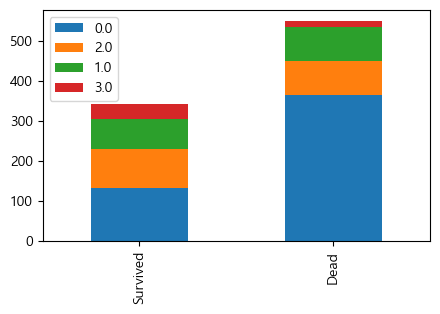

In [469]:
bar_chart("Fare")

In [470]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C85,1,1
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,2
3,4,1,1,female,2.0,1,0,113803,2.0,C123,0,1
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


### 5) Cabin 처리

In [471]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [472]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [473]:
train[train["Pclass"]==1]["Cabin"].value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

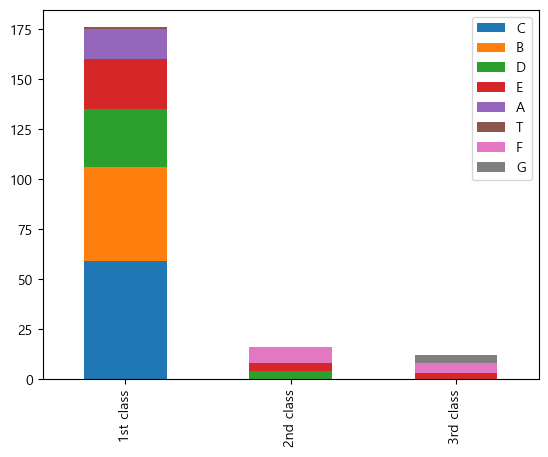

In [474]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

pd.DataFrame([Pclass1, Pclass2, Pclass3], index= ["1st class", "2nd class", "3rd class"]).plot(kind="bar", stacked=True)

In [475]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map({"A" : 0, "B" : 0.4, "C" : 0.8, "D" : 1.2, "E" : 1.6, "F": 2, "G" : 2.4, "T" : 2.8})

In [476]:
train.Cabin.value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [477]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [478]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title1       891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [479]:
test.Title1.value_counts()

0    240
2     78
1     72
3     28
Name: Title1, dtype: int64

### 6) 성별 숫자 인코딩

In [480]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male" : 0, "female" : 1})

In [481]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,0.8,0,1
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,0.8,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,1


### 7) 동승자 컬럼 합치기

In [482]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [483]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [484]:
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: FamilySize, dtype: int64

### 8) 필요없는 특성 제거 및 모델링 데이터 준비

In [485]:
features_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)

In [495]:
train = train.drop(["PassengerId"], axis = 1)

In [496]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title1,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,0.8,0,1,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,0.8,0,0,1
4,896,3,1,1.0,0.0,2.0,0,1,3


In [497]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

In [498]:
print(X.shape, y.shape)

(891, 8) (891,)


In [499]:
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target.csv", index=False)
test.to_csv("data/titanic/test-data.csv", index=False)

## (4) Model Training

- KNN
- DecisionTree
- RandomForest
- SVM
- NaiveBayes
- NeuralNetwork

In [500]:
from sklearn.model_selection import KFold

In [501]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [503]:
### KNN

knnclf = KNeighborsClassifier(n_neighbors=20)
score = cross_val_score(knnclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.8        0.78651685 0.83146067 0.84269663 0.86516854 0.79775281
 0.80898876 0.80898876 0.80898876 0.84269663]
81.93


In [511]:
### DecisionTree

dctclf = DecisionTreeClassifier(max_depth=6)
score = cross_val_score(dctclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.8        0.87640449 0.79775281 0.83146067 0.87640449 0.78651685
 0.84269663 0.83146067 0.78651685 0.82022472]
82.49


In [512]:
### RandomForest

rfclf = RandomForestClassifier(n_estimators=200)
score = cross_val_score(rfclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.82222222 0.86516854 0.78651685 0.80898876 0.87640449 0.82022472
 0.80898876 0.78651685 0.7752809  0.83146067]
81.82


In [514]:
### NaiveBayes
from sklearn.naive_bayes import BernoulliNB

nbclf = BernoulliNB()
score = cross_val_score(nbclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]
78.56


In [516]:
##### SupportVectorMachine
# 정규화에 민감한 SVC니까 정규화를 시켜주자
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

svmclf = SVC()
score = cross_val_score(svmclf, X_scaled, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.82222222 0.83146067 0.79775281 0.83146067 0.85393258 0.82022472
 0.83146067 0.82022472 0.79775281 0.82022472]
82.27


In [518]:
##### NeuralNetwork

mlpclf = MLPClassifier(hidden_layer_sizes=(300, 300, 300))
score = cross_val_score(mlpclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100,2))  # 백분율

[0.78888889 0.73033708 0.79775281 0.74157303 0.85393258 0.79775281
 0.7752809  0.79775281 0.78651685 0.84269663]
79.12


## (5) Testing

In [519]:
model = SVC()
model.fit(X_scaled, y)

SVC()

In [520]:
test_copy = test.drop("PassengerId", axis = 1).copy()
test_copy = scaler.transform(test_copy)

In [522]:
preds = model.predict(test_copy)

In [523]:
preds

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [526]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : preds})
submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [527]:
submission.to_csv("data/titanic/submission.csv", index=False)

In [529]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0A99-0F12

 C:\kimhotak13\PythonWork\AI 디렉터리

2023-05-19  오후 01:05    <DIR>          .
2023-05-19  오후 01:05    <DIR>          ..
2023-05-18  오전 11:58    <DIR>          .ipynb_checkpoints
2023-05-09  오후 06:23           211,298 0-Preview.ipynb
2023-05-09  오후 06:23           978,357 1_KNN.ipynb
2023-05-10  오후 04:55         1,536,009 2_Linear.ipynb
2023-05-11  오후 05:03           925,369 3_Logistic Regression.ipynb
2023-05-11  오후 03:37           373,663 4_Decision Tree(JSgod).ipynb
2023-05-18  오후 06:21           859,166 4_Decision Tree.ipynb
2023-05-18  오후 06:21           344,447 5_Ensemble.ipynb
2023-05-18  오후 06:20           935,110 6-SupportVectorMachine.ipynb
2023-05-18  오후 06:21           938,267 7-기타 알고리즘.ipynb
2023-05-19  오후 12:57           212,342 8 - 기타알고리즘2(사이킷런의 마무리) - 복사본 (2).ipynb
2023-05-19  오후 01:05           212,342 8 - 기타알고리즘2(사이킷런의 마무리).ipynb
2023-05-03  오후 12:19    <DIR>          cache
2023-05-12  오후 01:08             4,525 Classificatio